In [25]:
from problem import mlp_problem
from environment import Environment
import torch 
from environment import eval_handcrafted_optimizer
import stable_baselines3
from train_agent import eval_agent
import numpy as np
import matplotlib.pyplot as plt

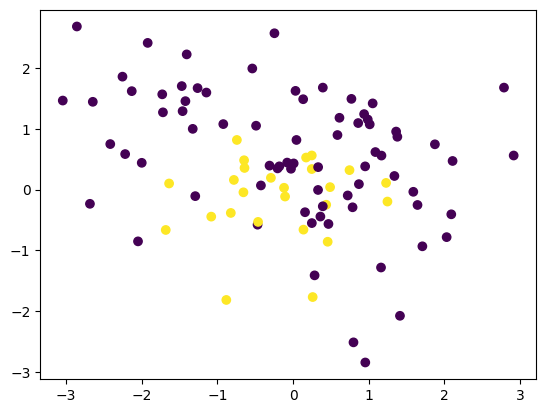

In [26]:
MLP_problem = mlp_problem()
#plot the dataset

x,y = MLP_problem["dataset"]
plt.scatter(x[:,0],x[:,1],c=y)

In [27]:
#show the model
MLP_problem["model0"]

Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): ReLU()
  (2): Linear(in_features=2, out_features=1, bias=True)
  (3): Sigmoid()
)

In [28]:
#show the objective function
MLP_problem["obj_function"](MLP_problem["model0"])

tensor(0.5692, grad_fn=<AddBackward0>)

In [29]:
# define the problem list
nb_problems = 100
train_problem_list = [mlp_problem() for _ in range(nb_problems)]
test_problem_list = [mlp_problem()]
# number of steps in each episode
model_training_steps = 40
agent_training_timesteps = 100000
optimizer_class_list=[torch.optim.SGD, torch.optim.Adam]
history_len = 25

train_env = Environment(problem_list = train_problem_list,
                num_steps = model_training_steps, 
                history_len = history_len, 
                optimizer_class_list = optimizer_class_list
                )
test_env = Environment(problem_list = test_problem_list,
                num_steps = model_training_steps, 
                history_len = history_len, 
                optimizer_class_list = optimizer_class_list,
                do_init_weights = False
                )

policy = stable_baselines3.DQN('MlpPolicy', train_env, verbose=0,
                                            tensorboard_log='tb_logs/norm')


/home/tidianes/miniconda3/envs/tid_env/lib/python3.10/site-packages/stable_baselines3/common/buffers.py:229: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 2.02GB > 1.50GB
  warnings.warn(


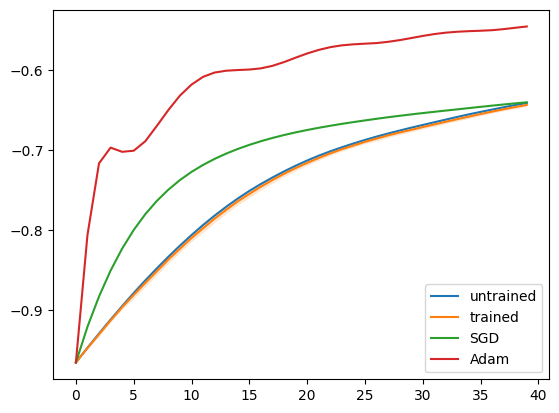

In [30]:
#evaluate trained and untrained agent

actions, rewards = eval_agent(test_env, policy, num_episodes=40, num_steps=model_training_steps)

plt.plot(np.mean(rewards, axis=0), label='untrained')
plt.fill_between(np.arange(len(rewards[0])), np.mean(rewards, axis=0) - np.std(rewards, axis=0), np.mean(rewards, axis=0) + np.std(rewards, axis=0), alpha=0.2)


policy.learn(total_timesteps=agent_training_timesteps)


actions, rewards = eval_agent(test_env, policy, num_episodes=40, num_steps=model_training_steps)

plt.plot(np.mean(rewards, axis=0), label='trained')
plt.fill_between(np.arange(len(rewards[0])), np.mean(rewards, axis=0) - np.std(rewards, axis=0), np.mean(rewards, axis=0) + np.std(rewards, axis=0), alpha=0.2)


#evaluate the handcrafted optimizers
rewards_sgd = eval_handcrafted_optimizer(test_problem_list, torch.optim.SGD, model_training_steps, do_init_weights=False)
rewards_adam = eval_handcrafted_optimizer(test_problem_list, torch.optim.Adam, model_training_steps, do_init_weights=False)
plt.plot(np.mean(rewards_sgd,axis=0), label="SGD")
plt.plot(np.mean(rewards_adam,axis=0), label="Adam")
plt.legend()


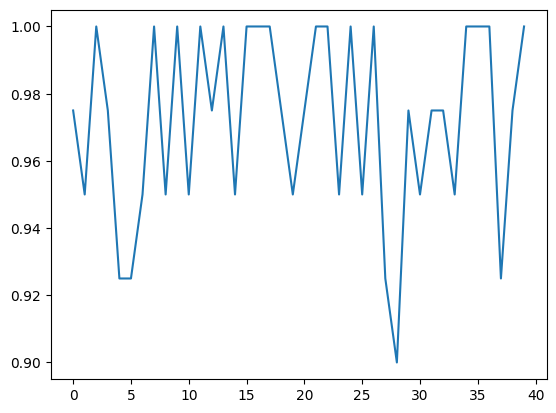

In [31]:
plt.plot(np.mean(actions, axis=0), label='actions')

In [32]:
actions

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])